# **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# **I am creating a dataset for classification using sklearns inbuild datasets**

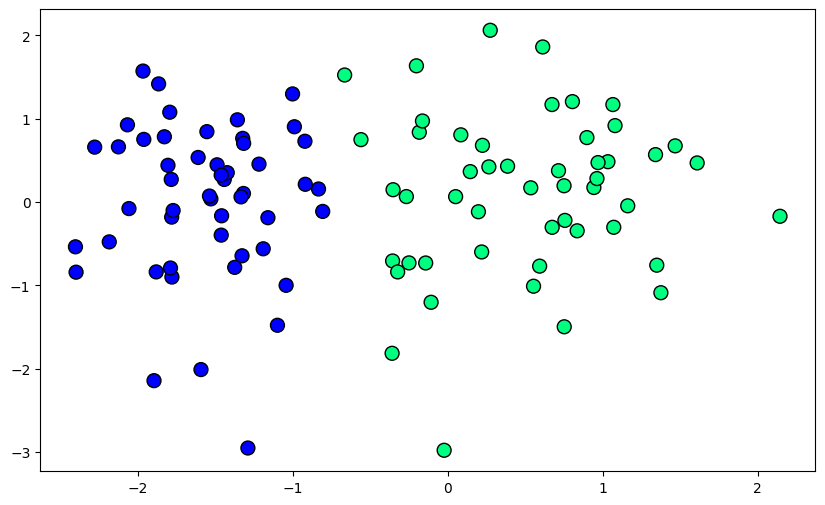

In [59]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)

plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=100, cmap='winter', edgecolor="k")

# **Creating functions for following parameters:**
1. Sigmoid
2. Gradient Descent

## **Sigmoid Function**

σ = $\frac{1}{1 + e^-z}$

In [60]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

## **Gradient Descent Function**

$W_{\text{new}}$ = $W_{\text{old}}$ + ρ * $\frac{1}{m}$ * ( (y - $\hat{y}$) * X)

where,                                                                           
$W_{\text{old}}$ = Old Weights                                                   
$W_{\text{new}}$ = New Weights                                                    
ρ = learning rate                                                                
m = number of samples                                                           





In [61]:
def gradient_descent(X, y, learning_rate, epochs):

  X = np.insert(X, 0, 1, axis=1) # Adding intercept at column 0
  weights = np.ones(X.shape[1]) # Number of weights == Number of columns

  # Applying Gradient Descent Formula
  for i in range(epochs):
    y_hat = sigmoid(np.dot(X, weights))
    weights = weights + learning_rate * (np.dot((y - y_hat),X) / X.shape[0])

  return weights[1:], weights[0]

# **Applying Algorithm**

## Calculating coefficient and intercept

In [62]:
coef_,intercept_ = gradient_descent(X, y, 0.5, 1000)

In [63]:
print(f"Coefficient: {coef_}")
print(f"Intercept: {intercept_}")

Coefficient: [7.29545533 0.27368133]
Intercept: 4.763701596169006


In [64]:
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

## We will test on randomly generated X inputs

In [65]:
x_input = np.linspace(-3,3,100)
y_input = m * x_input + b


(-3.0, 2.0)

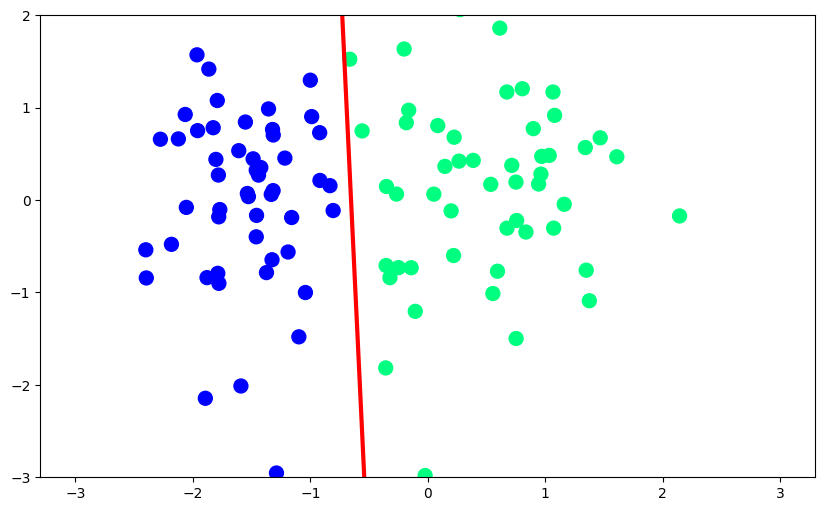

In [66]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)